In [2]:
# Leer el archivo CSV con el dataset procesado por el ETL
df = pd.read_csv('resultado_etl.csv')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Resumen de estadísticas descriptivas
resumen_estadisticas = df.describe()
print(resumen_estadisticas)


       ID_Club (FK)  Títulos_Primera  Títulos_Internacionales        Socios  \
count     10.000000        10.000000                      1.0     10.000000   
mean      32.000000         1.600000                      2.0   5242.700000   
std       20.188005         0.843274                      NaN   4760.735752   
min        3.000000         1.000000                      2.0    500.000000   
25%       14.000000         1.000000                      2.0   1856.500000   
50%       34.500000         1.000000                      2.0   3250.000000   
75%       46.250000         2.000000                      2.0   8750.000000   
max       63.000000         3.000000                      2.0  14501.000000   

       Cuota_Social  Ingresos_Socios  Entradas_Vendidas  \
count     10.000000     1.000000e+01          10.000000   
mean    4850.000000     2.630610e+07       28359.500000   
std      668.746755     2.387486e+07       12907.077268   
min     3500.000000     2.000000e+06        5292.000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


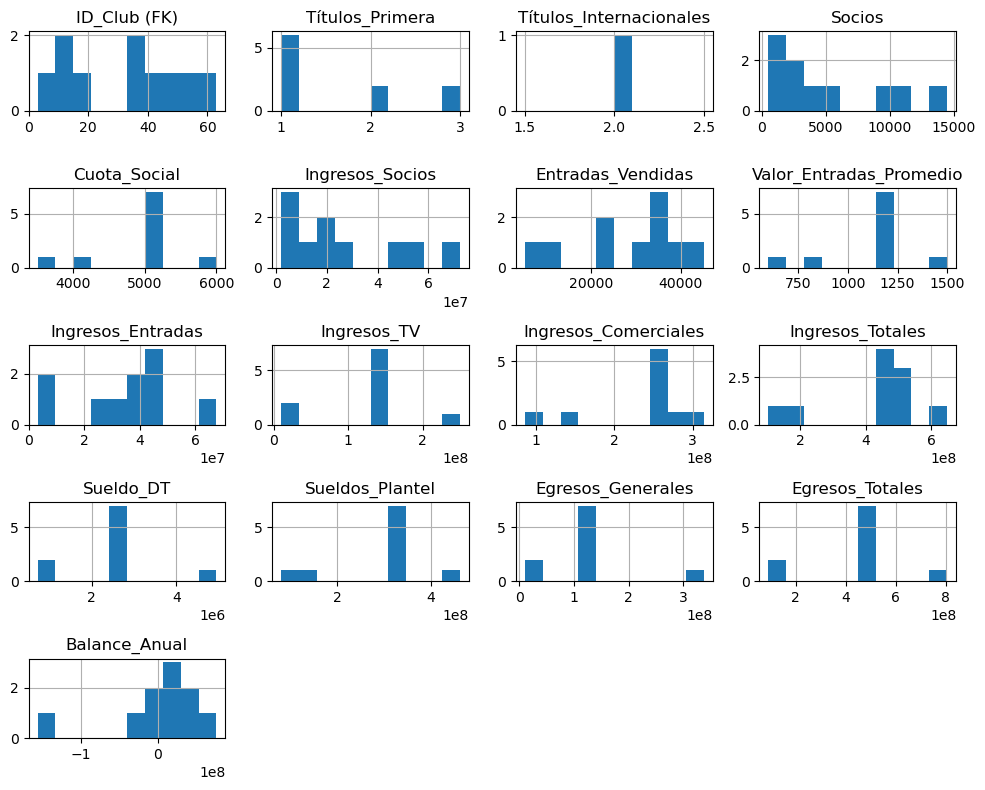

In [4]:
# Análisis univariado - Distribución de variables numéricas
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


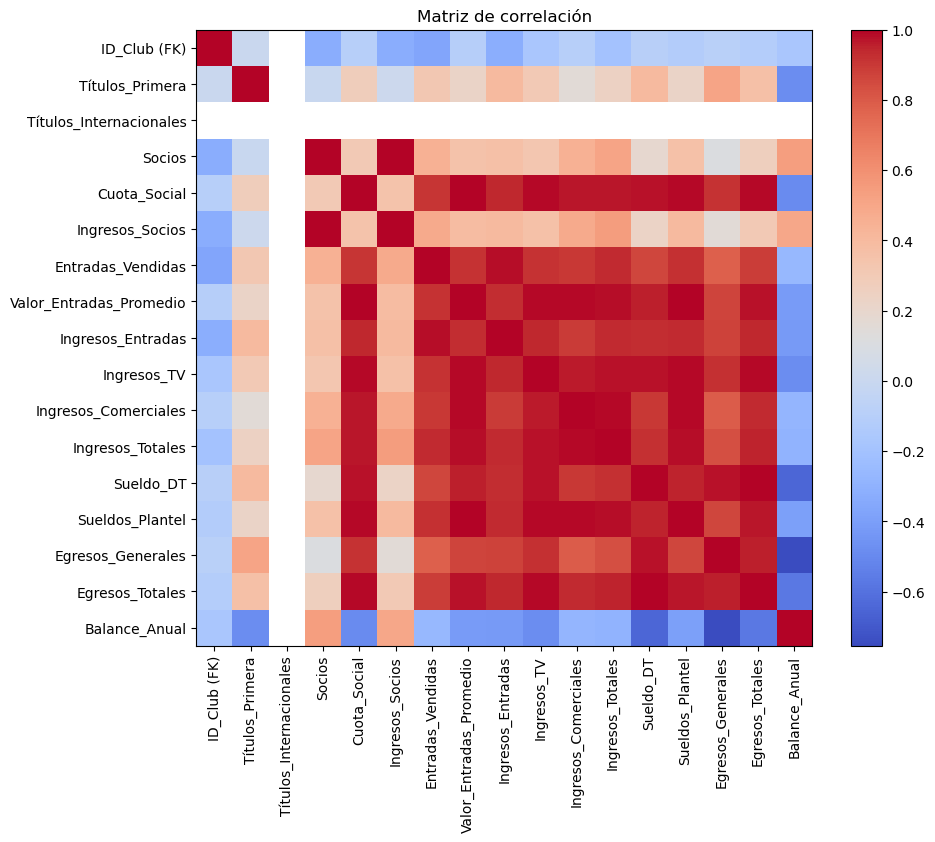

In [5]:
# Análisis bivariado - Correlación entre variables numéricas
matriz_correlacion = df.corr()
plt.figure(figsize=(10, 8))
plt.imshow(matriz_correlacion, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(matriz_correlacion.columns))
plt.xticks(tick_marks, matriz_correlacion.columns, rotation='vertical')
plt.yticks(tick_marks, matriz_correlacion.columns)
plt.title('Matriz de correlación')
plt.show()

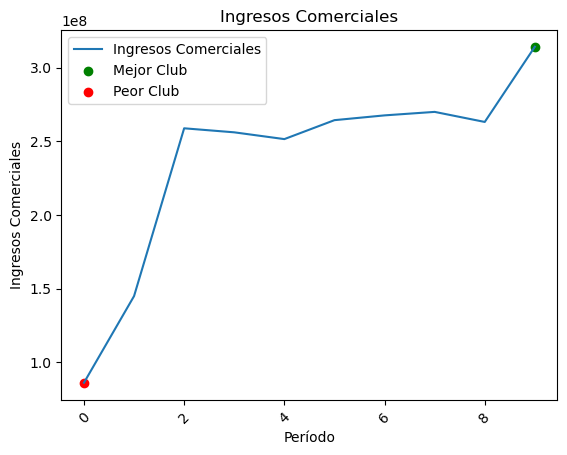

Club con mejores ingresos comerciales:
   ID_Club (FK)          Nombre_Club Nombre_Coloquial  Títulos_Primera  \
9            33  Arsenal Futbol Club          Arsenal              3.0   

   Títulos_Internacionales Afiliación_AFA  Socios  Cuota_Social  \
9                      2.0             Si    2926          6000   

   Ingresos_Socios  Entradas_Vendidas  Valor_Entradas_Promedio  \
9         17556000              45137                     1500   

   Ingresos_Entradas  Ingresos_TV  Ingresos_Comerciales  Ingresos_Totales  \
9           67705500    250000000             314166363         649427863   

   Sueldo_DT  Sueldos_Plantel  Egresos_Generales  Egresos_Totales  \
9    4945776        463160898          337260345        805367019   

   Balance_Anual  
9     -155939156  

Club con peores ingresos comerciales:
   ID_Club (FK)             Nombre_Club   Nombre_Coloquial  Títulos_Primera  \
0            20  Club Sportivo Barracas  Sportivo Barracas              2.0   

   Títulos_Int

In [6]:


# Obtener los datos de ingresos comerciales
ingresos_comerciales = df['Ingresos_Comerciales']

# Encontrar el club con los mejores ingresos comerciales
mejor_club = df[df['Ingresos_Comerciales'] == ingresos_comerciales.max()]

# Encontrar el club con los peores ingresos comerciales
peor_club = df[df['Ingresos_Comerciales'] == ingresos_comerciales.min()]

# Visualización de los ingresos comerciales del club con mejores ingresos y peores ingresos
plt.plot(ingresos_comerciales, label='Ingresos Comerciales')
plt.scatter(mejor_club.index, mejor_club['Ingresos_Comerciales'], color='green', label='Mejor Club')
plt.scatter(peor_club.index, peor_club['Ingresos_Comerciales'], color='red', label='Peor Club')
plt.title('Ingresos Comerciales')
plt.xlabel('Período')
plt.ylabel('Ingresos Comerciales')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Imprimir los clubes con mejores y peores ingresos comerciales
print("Club con mejores ingresos comerciales:")
print(mejor_club)

print("\nClub con peores ingresos comerciales:")
print(peor_club)


In [7]:


# Ordenar el dataframe por la columna 'Egresos_Totales' en orden descendente
equipo_mas_gasto = df.sort_values('Egresos_Totales', ascending=False).iloc[0]

# Obtener el nombre del equipo con más gasto
nombre_equipo_mas_gasto = equipo_mas_gasto['Nombre_Club']

# Obtener el valor del gasto máximo
gasto_maximo = equipo_mas_gasto['Egresos_Totales']

# Imprimir los resultados
print(f"El equipo que más dinero gasta es: {nombre_equipo_mas_gasto}")
print(f"Gasto total: {gasto_maximo}")


El equipo que más dinero gasta es: Arsenal Futbol Club
Gasto total: 805367019


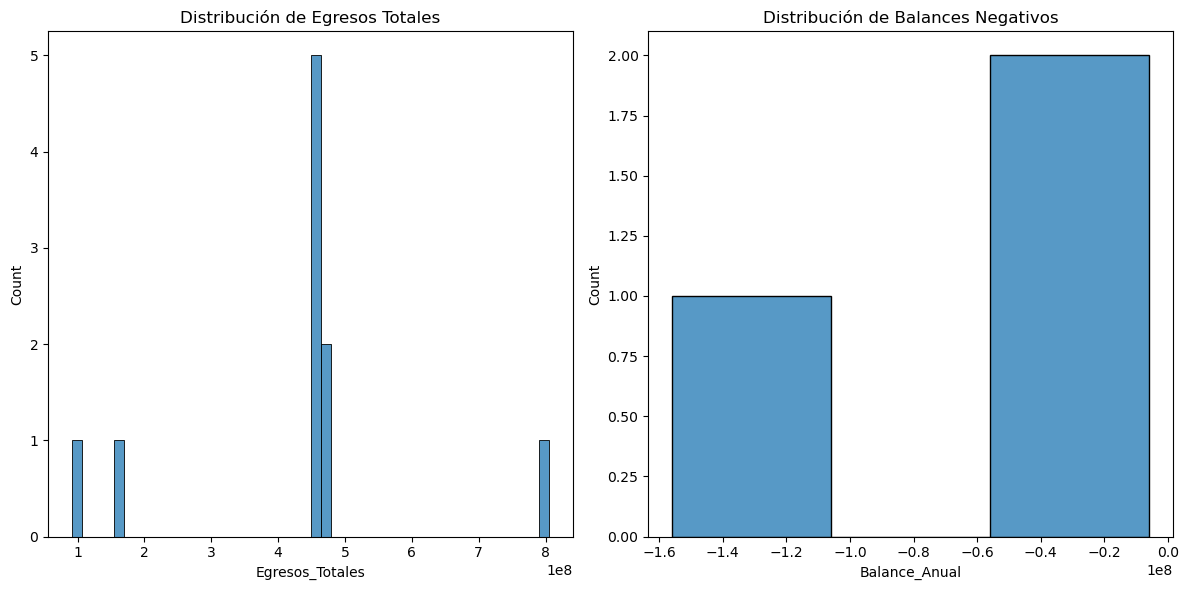

In [8]:

# Filtrar los equipos con balances negativos
equipos_deficitarios = df[df['Balance_Anual'] < 0]

# Crear un subplot para los gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Graficar la distribución de los egresos
sns.histplot(data=df, x='Egresos_Totales', ax=axes[0])
axes[0].set_title('Distribución de Egresos Totales')

# Graficar la distribución de los balances negativos
sns.histplot(data=equipos_deficitarios, x='Balance_Anual', ax=axes[1])
axes[1].set_title('Distribución de Balances Negativos')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


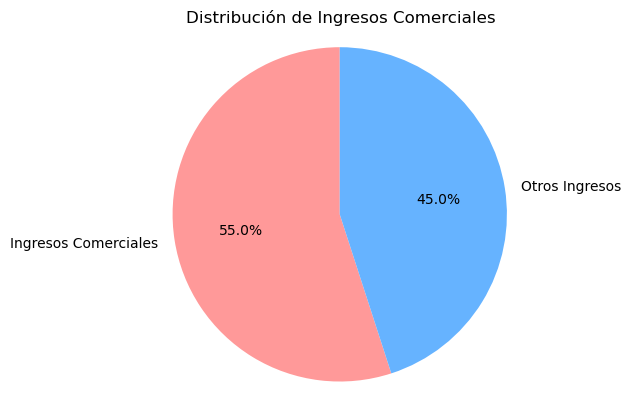

In [9]:


kpi_ingresos_comerciales = (df['Ingresos_Comerciales'].sum() / df['Ingresos_Totales'].sum()) * 100

labels = ['Ingresos Comerciales', 'Otros Ingresos']
sizes = [kpi_ingresos_comerciales, 100 - kpi_ingresos_comerciales]
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribución de Ingresos Comerciales')
plt.show()


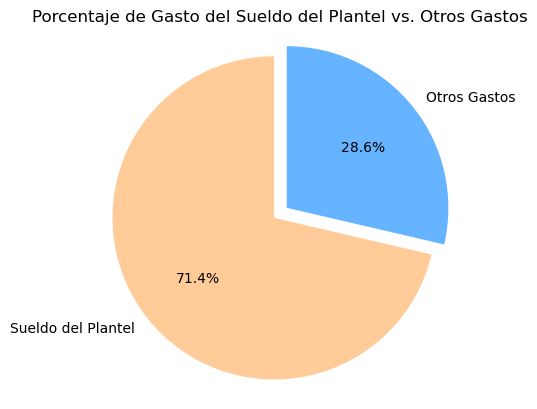

In [10]:
import matplotlib.pyplot as plt

kpi_sueldo = (df['Sueldos_Plantel'].sum() / df['Egresos_Totales'].sum()) * 100
kpi_otros_gastos = 100 - kpi_sueldo

labels = ['Sueldo del Plantel', 'Otros Gastos']
sizes = [kpi_sueldo, kpi_otros_gastos]
colors = ['#ffcc99', '#66b3ff']
explode = (0.1, 0)  # Resaltar la primera porción (Sueldo del Plantel)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Porcentaje de Gasto del Sueldo del Plantel vs. Otros Gastos')
plt.show()


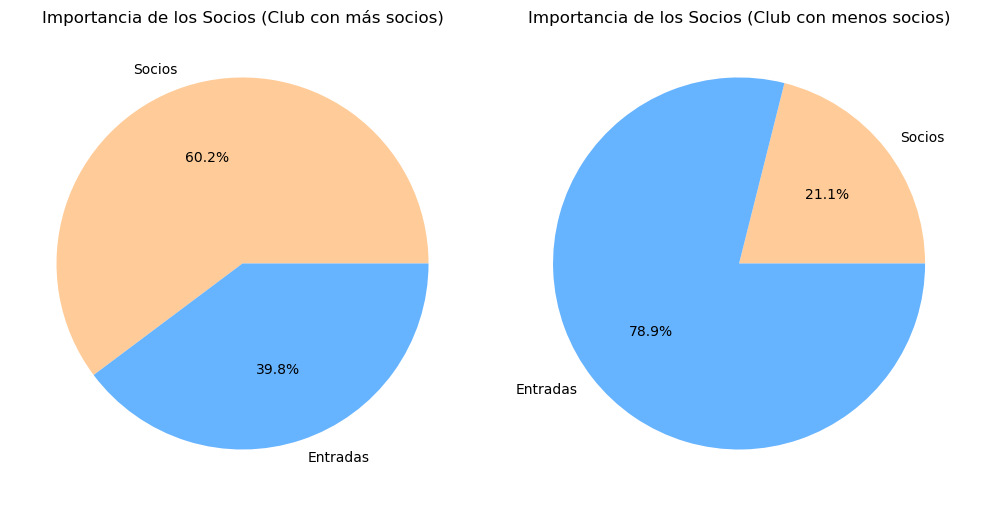

In [11]:
import matplotlib.pyplot as plt

# Obtener los datos de los clubes
club_mas_socios = df[df['Socios'] == df['Socios'].max()]
club_menos_socios = df[df['Socios'] == df['Socios'].min()]

# Calcular los porcentajes de los ingresos de los socios
porcentaje_mas_socios = [club_mas_socios['Ingresos_Socios'].values[0], club_mas_socios['Entradas_Vendidas'].values[0] * club_mas_socios['Valor_Entradas_Promedio'].values[0]]
porcentaje_menos_socios = [club_menos_socios['Ingresos_Socios'].values[0], club_menos_socios['Entradas_Vendidas'].values[0] * club_menos_socios['Valor_Entradas_Promedio'].values[0]]

# Configurar los datos para el gráfico de torta
labels = ['Socios', 'Entradas']
colors = ['#ffcc99', '#66b3ff']

# Generar el gráfico de torta
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].pie(porcentaje_mas_socios, labels=labels, colors=colors, autopct='%1.1f%%')
axs[0].set_title('Importancia de los Socios (Club con más socios)')

axs[1].pie(porcentaje_menos_socios, labels=labels, colors=colors, autopct='%1.1f%%')
axs[1].set_title('Importancia de los Socios (Club con menos socios)')

plt.tight_layout()
plt.show()


Conclusiones

Sueldo del plantel:

El sueldo del plantel representa una parte significativa de los gastos totales de los clubes. Es importante gestionar de manera eficiente esta área para mantener un equilibrio financiero y evitar problemas de sostenibilidad a largo plazo.
Es necesario evaluar constantemente la relación entre el rendimiento deportivo y el gasto en sueldos del plantel. Se deben implementar políticas salariales adecuadas que premien el desempeño y fomenten la motivación de los jugadores.
La gestión financiera eficiente de los sueldos del plantel es fundamental para garantizar la estabilidad económica y el crecimiento sostenible del club.

Ingresos comerciales:

Los ingresos comerciales son una fuente importante de financiamiento para los clubes. Es fundamental buscar oportunidades de crecimiento y diversificación en esta área para asegurar una base financiera sólida.
Los contratos de patrocinio y acuerdos comerciales deben evaluarse cuidadosamente en términos de rentabilidad y alineación con los valores y objetivos del club.
La implementación de estrategias de marketing y promoción efectivas puede ayudar a fortalecer la imagen del club y atraer nuevos patrocinadores.

Socios:

El número total de socios varía significativamente entre los clubes analizados. Es importante tener en cuenta esta diferencia al desarrollar estrategias de marketing y fidelización de socios.
Los ingresos generados a partir de las cuotas sociales representan una parte significativa de los ingresos totales de los clubes. Es fundamental mantener una base sólida de socios y desarrollar estrategias para aumentar su participación económica en el club.
Los socios son un activo clave para la estabilidad financiera de los clubes, por lo que es importante implementar acciones de retención y atracción de socios para mantener un flujo constante de ingresos.

Posibles soluciones a estos 3 indicadores de crecimiento

Sueldo del plantel:

Implementar una política salarial basada en el rendimiento, donde los jugadores sean recompensados en función de su desempeño y contribución al éxito del equipo.
Establecer cláusulas contractuales que incentiven la reducción de salarios en caso de bajo rendimiento o lesiones prolongadas.
Realizar un análisis detallado de los costos asociados al plantel, identificando áreas de optimización y explorando la posibilidad de incorporar jugadores jóvenes provenientes de las divisiones inferiores.

Ingresos comerciales:

Explotar el potencial de los medios digitales para generar ingresos comerciales a través de acuerdos de patrocinio con marcas relevantes y promociones en línea.
Diversificar las fuentes de ingresos comerciales explorando oportunidades de licenciamiento de productos, contratos de merchandising y acuerdos de colaboración con empresas relacionadas.
Potenciar la venta de espacios publicitarios en el estadio, en el kit de juego del equipo y en otros activos digitales del club.

Socios:

Implementar estrategias de marketing digital para promover la afiliación de socios a través de redes sociales, anuncios en línea y campañas por correo electrónico.
Realizar eventos exclusivos para socios, como encuentros con jugadores, visitas al vestuario o acceso privilegiado a entrenamientos.
Establecer programas de referidos, donde los socios actuales obtengan beneficios por recomendar a nuevos socios.



